In [4]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
# %config Completer.use_jedi = False

In [5]:
import os
import sys
module_path = "/Users/jmccarty/Data/221205_ipv_workbench/github/IPV_Workbench"
sys.path.insert(0, module_path)
import pandas as pd
import pickle
import json
from itertools import repeat
import multiprocess
from pprint import pprint
import numpy as np
import pvlib
import proplot as pplt
import ipv_workbench as ipv
from ipv_workbench.utilities import utils, circuits, time_utils
from ipv_workbench.devices import devices
from ipv_workbench.simulator import simulations as ipv_sim
from ipv_workbench.simulator import simulations_mp as ipv_sim_mp
from ipv_workbench.simulator import calculations as ipv_calc
from ipv_workbench.visualize import plots as ipv_plots
from ipv_workbench.translators import panelizer
from ipv_workbench.sample import dummies
from tqdm import tqdm
import functools, operator, collections
import multiprocess as mp
import time

In [14]:
mod_df = pvlib.pvsystem.retrieve_sam("CECMod").transpose()


cigs_maps = "/Users/jmccarty/Desktop/miasole_maps.xlsx"
cigs_maps2 = "/Users/jmccarty/Desktop/miasole_maps 2.xlsx"
mono_maps = "/Users/jmccarty/Desktop/monocrystalline_halfcut_maps.xlsx"
poly_maps = "/Users/jmccarty/Desktop/polycrystalline_maps.xlsx"
asi_maps = "/Users/jmccarty/Desktop/asi_map.xlsx"
cdte_maps = "/Users/jmccarty/Desktop/cdte_maps.xlsx"


## Mono

9.490876848035745 33.72249795958657 320.0560751425728


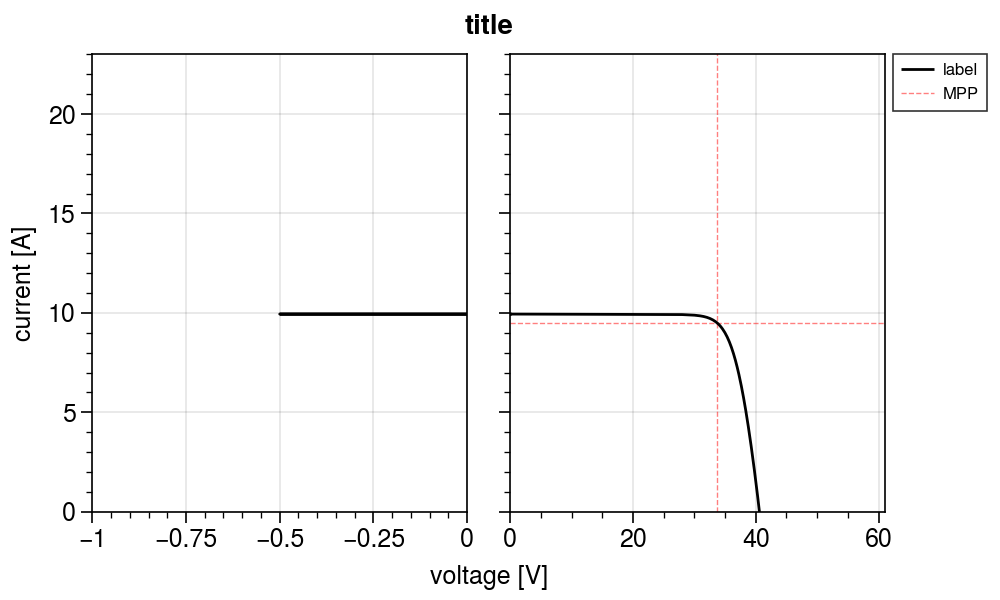

In [19]:
p = mod_df.transpose()[[m for m in mod_df.index if "peak" in m.lower()]]['Hanwha_Q_CELLS_Q_PEAK_DUO_BLK_G5_SC_320']
submodule_map, subdiode_map, subcell_map = utils.read_map_excel(mono_maps)

ncols = 6#1
nrows = 20#112

kwargs = {
        'breakdown_factor': 2e-3,
        'breakdown_exp': 3.28,
        'breakdown_voltage': -5.5,
    }

p['N_subcells'] = 1
p['N_p'] = 2
p['N_s'] = p['N_s']
p['diode_threshold'] = -0.5
for k, v in kwargs.items():
    p[k] = v


irrad_hoy = np.ones((nrows,ncols))*1000
temp_hoy = np.array([[25]*p['N_subcells']*ncols]*nrows)

Imod, Vmod = ipv_calc.calculate_module_curve_multiple_column(irrad_hoy,temp_hoy,p,submodule_map,subdiode_map)
Pmod = Imod*Vmod
print(Imod[np.argmax(Pmod)],Vmod[np.argmax(Pmod)],np.max(Pmod))
ipv_plots.plot_curves(Imod,
                      Vmod,
                      p,
                      y_max=23,
                      # labels=[str(t) for t in list(zip(Geff,Tcell))],
                      mpp=True,
                      x_min=-1,
                      )

## Poly

In [ ]:
p = mod_df.transpose()[[m for m in mod_df.index if "hyundai".lower() in m.lower()]]['Hyundai_Heavy_Industries_Green_Energy_Co__HiS_M320TI']
submodule_map, subdiode_map, subcell_map = read_map_excel(poly_maps)

ncols = 6#1
nrows = 12#112

kwargs = {
        'breakdown_factor': 2e-3,
        'breakdown_exp': 3.28,
        'breakdown_voltage': -5.5,
    }

p['N_subcells'] = 1
p['N_p'] = 1
p['N_s'] = 72
p['diode_threshold'] = -0.5
for k, v in kwargs.items():
    p[k] = v


irrad_hoy = np.ones((nrows,ncols))*1000
temp_hoy = np.array([[25]*p['N_subcells']*ncols]*nrows)

Imod, Vmod = ipv_calc.calculate_module_curve_multiple_column(irrad_hoy,temp_hoy,p,submodule_map,subdiode_map)
Pmod = Imod*Vmod
print(Imod[np.argmax(Pmod)],Vmod[np.argmax(Pmod)],np.max(Pmod))
ipv_plots.plot_curves(Imod,
                      Vmod,
                      p,
                      y_max=23,
                      # labels=[str(t) for t in list(zip(Geff,Tcell))],
                      mpp=True,
                      x_min=-1,
                      )

## CIGS

In [ ]:
p = mod_df.transpose()[[m for m in mod_df.index if "mia" in m.lower()]]['Miasole_FLEX_03_320W']
submodule_map, subdiode_map, subcell_map = utils.read_map_excel(cigs_maps2)

ncols = 4#1
nrows = 36#112

kwargs = {
        'breakdown_factor': 2e-3,
        'breakdown_exp': 3.28,
        'breakdown_voltage': -5.5,
    }

p['N_subcells'] = 1
p['N_p'] = 2
p['N_s'] = 72
p['diode_threshold'] = -0.5
for k, v in kwargs.items():
    p[k] = v


irrad_hoy = np.ones((nrows,ncols))*1000
temp_hoy = np.array([[25]*p['N_subcells']*ncols]*nrows)

Imod, Vmod = ipv_calc.calculate_module_curve_multiple_column(irrad_hoy,temp_hoy,p,submodule_map,subdiode_map)
Pmod = Imod*Vmod
print(Imod[np.argmax(Pmod)],Vmod[np.argmax(Pmod)],np.max(Pmod))
ipv_plots.plot_curves(Imod,
                      Vmod,
                      p,
                      y_max=23,
                      # labels=[str(t) for t in list(zip(Geff,Tcell))],
                      mpp=True,
                      x_min=-1,
                      )

## aSi

In [ ]:
p = mod_df.transpose()[[m for m in mod_df.index if "du_pont".lower() in m.lower()]]['Du_Pont_Apollo_DA136_C2']
submodule_map, subdiode_map, subcell_map = read_map_excel(asi_maps)

ncols = 119#6#1
nrows = 1#20#112
kwargs = {
        'breakdown_factor': 2e-3,
        'breakdown_exp': 3.28,
        'breakdown_voltage': -5.5,
    }

p['N_subcells'] = 10
p['N_p'] = 1
p['N_s'] = 119
p['diode_threshold'] = -0.5
for k, v in kwargs.items():
    p[k] = v

temp_hoy = np.vstack([np.ones((nrows,ncols))*25 for n in range(0,p['N_subcells'])])
irrad_hoy = np.vstack([np.ones((nrows,ncols))*1000 for n in range(0,p['N_subcells'])])


Imod, Vmod = ipv_calc.calculate_module_curve_single_row(irrad_hoy,temp_hoy,p,submodule_map,subdiode_map,subcell_map)
Pmod = Imod*Vmod
print(Imod[np.argmax(Pmod)],Vmod[np.argmax(Pmod)],np.max(Pmod))
ipv_plots.plot_curves(Imod,
                      Vmod,
                      p,
                      y_max=23,
                      # labels=[str(t) for t in list(zip(Geff,Tcell))],
                      mpp=True,
                      x_min=-1,
                      )

## CdTe

2.2277690014846843 172.97059881910303 385.33853821744106


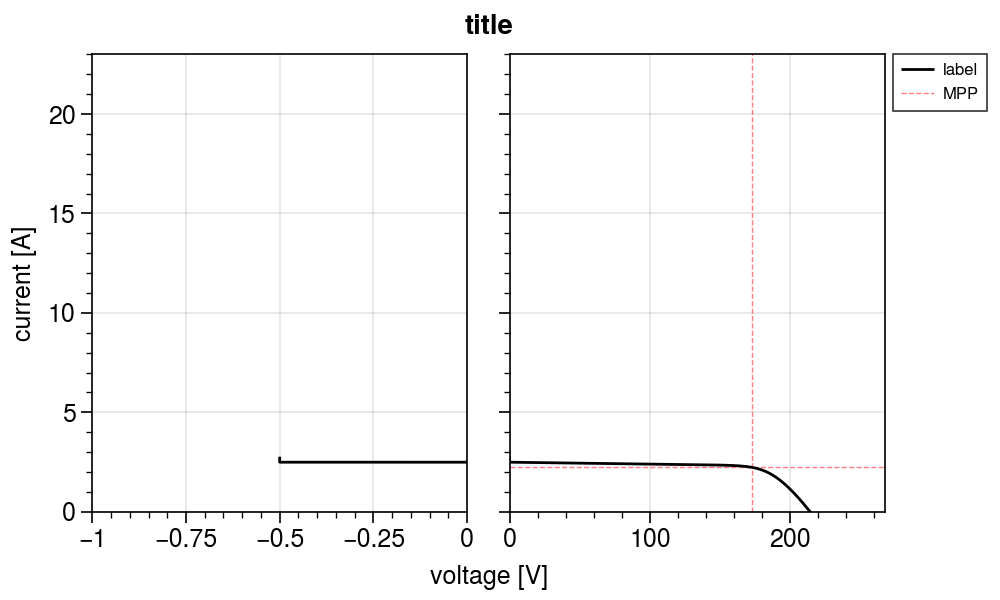

In [16]:
p = mod_df.transpose()[[m for m in mod_df.index if "First_Solar".lower() in m.lower()]]['First_Solar__Inc__FS_6385']
submodule_map, subdiode_map, subcell_map = utils.read_map_excel(cdte_maps)

ncols = 264#6#1
nrows = 1#20#112
kwargs = {
        'breakdown_factor': 2e-3,
        'breakdown_exp': 3.28,
        'breakdown_voltage': -5.5,
    }

p['N_subcells'] = 10
p['N_p'] = 1
p['N_s'] = 264
p['diode_threshold'] = -0.5
for k, v in kwargs.items():
    p[k] = v

temp_hoy = np.vstack([np.ones((nrows,ncols))*25 for n in range(0,p['N_subcells'])])
irrad_hoy = np.vstack([np.ones((nrows,ncols))*1000 for n in range(0,p['N_subcells'])])


Imod, Vmod = ipv_calc.calculate_module_curve_single_row(irrad_hoy,temp_hoy,p,submodule_map,subdiode_map,subcell_map)
Pmod = Imod*Vmod
print(Imod[np.argmax(Pmod)],Vmod[np.argmax(Pmod)],np.max(Pmod))
ipv_plots.plot_curves(Imod,
                      Vmod,
                      p,
                      y_max=23,
                      # labels=[str(t) for t in list(zip(Geff,Tcell))],
                      mpp=True,
                      x_min=-1,
                      )